<a href="https://colab.research.google.com/github/NamNT36/AI_24-02-23/blob/main/AI_W4_FRI_24_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


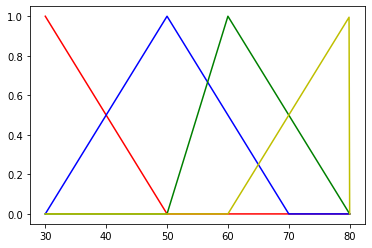

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80.1,0.1)

slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_last = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_last,'g',linewidth = 1.5, label = 'medium_last')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full_speed')

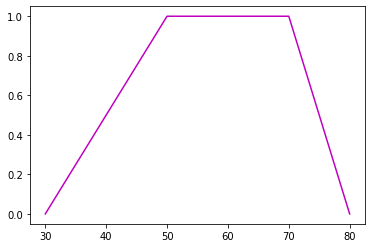

In [ ]:
trapezoid = fuzz.trapmf(x,[30,50,70,80])
plt.figure()
plt.plot(x,trapezoid,'m',linewidth = 1.5, label = 'trapezoid')

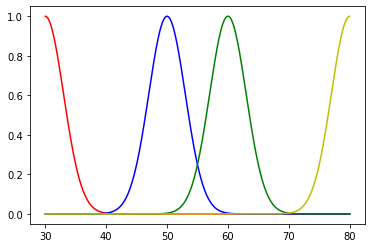

In [ ]:
slow = fuzz.gaussmf(x,30,3)
medium = fuzz.gaussmf(x,50,3)
medium_last = fuzz.gaussmf(x,60,3)
full_speed = fuzz.gaussmf(x,80,3)

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_last,'g',linewidth = 1.5, label = 'medium_last')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full_speed')

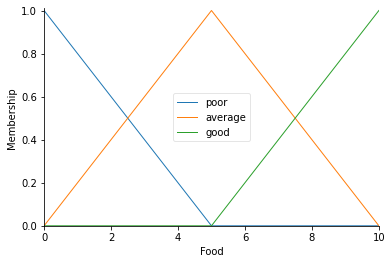

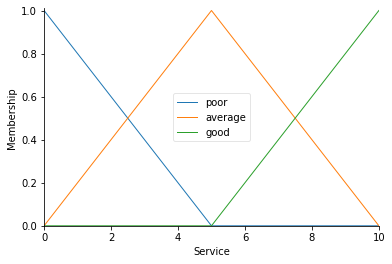

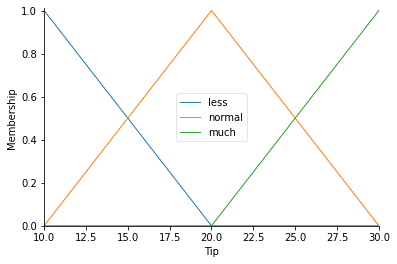

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'Food')
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
tip = ctrl.Consequent(np.arange(10,31,1),'Tip')

food['poor'] = fuzz.trimf(np.arange(0,11,1),[0,0,5])
food['average'] = fuzz.trimf(np.arange(0,11,1),[0,5,10])
food['good'] = fuzz.trimf(np.arange(0,11,1),[5,10,10])

service['poor'] = fuzz.trimf(np.arange(0,11,1),[0,0,5])
service['average'] = fuzz.trimf(np.arange(0,11,1),[0,5,10])
service['good'] = fuzz.trimf(np.arange(0,11,1),[5,10,10])

tip['less'] = fuzz.trimf(np.arange(10,31,1),[10,10,20])
tip['normal'] = fuzz.trimf(np.arange(10,31,1),[10,20,30])
tip['much'] = fuzz.trimf(np.arange(10,31,1),[20,30,30])

food.view()   #food['poor'].view
service.view()
tip.view()

19.999999999999996


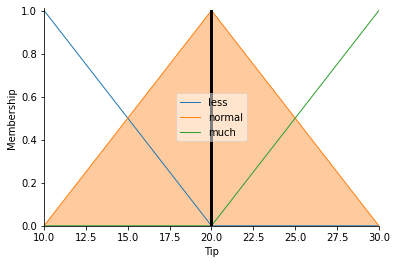

In [ ]:
rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'],tip['normal'])
rule4 = ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 5
tipping.input['Service'] = 5
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)

91.66666666666666


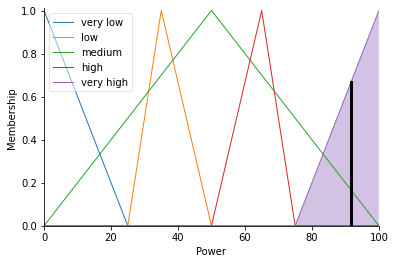

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'Time')    #time: 10->180 phut
rice = ctrl.Antecedent(np.arange(200,2001,1),'Rice')  #rice: 200g->2000g
power = ctrl.Consequent(np.arange(0,101,1),'Power')   #power: 0->100%

time['very fast'] = fuzz.trimf(np.arange(10,181,1),[10,10,50])
time['fast'] = fuzz.trimf(np.arange(10,181,1),[50,75,100])
time['average'] = fuzz.trimf(np.arange(10,181,1),[10,100,180])
time['short'] = fuzz.trimf(np.arange(10,181,1),[100,120,140])
time['very short'] = fuzz.trimf(np.arange(10,181,1),[140,180,180])

rice['very less'] = fuzz.trimf(np.arange(200,2001,1),[200,200,600])
rice['less'] = fuzz.trimf(np.arange(200,2001,1),[600,900,1100])
rice['normal'] = fuzz.trimf(np.arange(200,2001,1),[200,1100,2000])
rice['much'] = fuzz.trimf(np.arange(200,2001,1),[1100,1300,1500])
rice['very much'] = fuzz.trimf(np.arange(200,2001,1),[1500,2000,2000])

power['very low'] = fuzz.trimf(np.arange(0,101,1),[0,0,25])
power['low'] = fuzz.trimf(np.arange(0,101,1),[25,35,50])
power['medium'] = fuzz.trimf(np.arange(0,101,1),[0,50,100])
power['high'] = fuzz.trimf(np.arange(0,101,1),[50,65,75])
power['very high'] = fuzz.trimf(np.arange(0,101,1),[75,100,100])

#----------------------------------------------------------------------
#(1)
rule1 = ctrl.Rule(time['very fast'] & rice['very less'],power['medium'])
rule2 = ctrl.Rule(time['very fast'] & rice['less'],power['high'])
rule3 = ctrl.Rule(time['very fast'] & rice['normal'],power['very high'])
rule4 = ctrl.Rule(time['very fast'] & rice['much'],power['very high'])
rule5 = ctrl.Rule(time['very fast'] & rice['very much'],power['very high'])
#(2)
rule6 = ctrl.Rule(time['fast'] & rice['very less'],power['medium'])
rule7 = ctrl.Rule(time['fast'] & rice['less'],power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['normal'],power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'],power['very high'])
rule10 = ctrl.Rule(time['fast'] & rice['very much'],power['very high'])
#(3)
rule11 = ctrl.Rule(time['average'] & rice['very less'],power['low'])
rule12 = ctrl.Rule(time['average'] & rice['less'],power['low'])
rule13 = ctrl.Rule(time['average'] & rice['normal'],power['medium'])
rule14 = ctrl.Rule(time['average'] & rice['much'],power['high'])
rule15 = ctrl.Rule(time['average'] & rice['very much'],power['high'])
#(4)
rule16 = ctrl.Rule(time['short'] & rice['very less'],power['medium'])
rule17 = ctrl.Rule(time['short'] & rice['less'],power['low'])
rule18 = ctrl.Rule(time['short'] & rice['normal'],power['low'])
rule19 = ctrl.Rule(time['short'] & rice['much'],power['very low'])
rule20 = ctrl.Rule(time['short'] & rice['very much'],power['very low'])
#(5)
rule21 = ctrl.Rule(time['very short'] & rice['very less'],power['medium'])
rule22 = ctrl.Rule(time['very short'] & rice['less'],power['low'])
rule23 = ctrl.Rule(time['very short'] & rice['normal'],power['very low'])
rule24 = ctrl.Rule(time['very short'] & rice['much'],power['very low'])
rule25 = ctrl.Rule(time['very short'] & rice['very much'],power['very low'])
#----------------------------------------------------------------------
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                                   rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Time'] = 10     ## 10'->180'
tipping.input['Rice'] = 2000    ## 200g->2000g
tipping.compute()
print(tipping.output['Power'])
power.view(sim = tipping)